In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans

file_path = 'cleaning_notebook/AB_cleaned_formatted.xlsx'
sheet_name = 'Sheet1'

df = pd.read_excel(file_path, sheet_name=sheet_name)


In [42]:
# Define the list of columns you want to cluster
columns_to_cluster = ['BABYCARE', 'BAKERY (SELF SERVICE)', 'BAKERY (SERVICE)',	'BEVERAGES WITH ALCOHOL',	
                      'CANS AND JARS', 'CEREALS AND HOT BEVERAGES','CHEESE', 'CLOTHING, FOOTWARE AND ACCESSORIES',
                      'COLD CUTS', 'CONFECTIONARY', 'COOKING AND PASTRY INGREDIENTS', 'DAIRY AND EGGS',	'DELICATESSEN AND READY MEALS',
                      'DETERGENTS AND CLEANING', 'FRESH FISH & SEAFOOD', 'FRESH MEAT',	'FROZEN',  'FRUITS AND VEGETABLES', 'HOUSEHOLD ESSENTIALS',
                      'HOUSEHOLD LINEN',	'INSECTISIDES AND AIR FRESHNERS',	'OTHER COMMERCIAL ACTIVITIES', 'PERSONAL CARE AND HYGIENE',
                      'PET FOOD AND ACCESSORIES',	'REFRESHMENTS, JUICES AND WATER',	'SALTY SNACKS AND DRIED NUTS',
                      'SEASONAL AND GARDENING',	'STATIONERY AND TOBACO PRODUCTS',	'TISSUE PAPER', 'TOOLS, GADGETS AND APPLIANCES', 'TRADITIONAL SWEETS'
]

# Extract only these columns into a new DataFrame
data_for_clustering = df[columns_to_cluster]

# Calculate variance for each category
variances = data_for_clustering.var()

# Sort by variance (descending) to identify high-variance features
sorted_variances = variances.sort_values(ascending=False)

print(sorted_variances)

cv = data_for_clustering.std() / data_for_clustering.mean()
cv_sorted = cv.sort_values(ascending=False)

print(cv_sorted)


FRESH MEAT                            6.185017e-04
CHEESE                                2.255620e-04
FRUITS AND VEGETABLES                 2.156482e-04
BEVERAGES WITH ALCOHOL                1.911810e-04
COOKING AND PASTRY INGREDIENTS        1.200711e-04
DAIRY AND EGGS                        1.104156e-04
DELICATESSEN AND READY MEALS          8.140906e-05
CONFECTIONARY                         6.961676e-05
PERSONAL CARE AND HYGIENE             6.609963e-05
REFRESHMENTS, JUICES AND WATER        5.415646e-05
CEREALS AND HOT BEVERAGES             5.210799e-05
FROZEN                                4.177970e-05
FRESH FISH & SEAFOOD                  4.163427e-05
BAKERY (SELF SERVICE)                 3.291732e-05
DETERGENTS AND CLEANING               2.964723e-05
SALTY SNACKS AND DRIED NUTS           1.867914e-05
COLD CUTS                             1.777956e-05
HOUSEHOLD ESSENTIALS                  1.632594e-05
BABYCARE                              1.580753e-05
TISSUE PAPER                   

In [43]:
df['FOOD'] = df[['BAKERY (SELF SERVICE)','BAKERY (SERVICE)', 'CEREALS AND HOT BEVERAGES', 'CHEESE', 'COLD CUTS',
                 'CONFECTIONARY', 'COOKING AND PASTRY INGREDIENTS', 'DAIRY AND EGGS',	'DELICATESSEN AND READY MEALS',
                 'FRESH MEAT','FROZEN', 'FRUITS AND VEGETABLES', 'HOUSEHOLD ESSENTIALS', 'SALTY SNACKS AND DRIED NUTS', 'TRADITIONAL SWEETS' ]].sum(axis=1)
df['BEVERAGES'] = df[['BEVERAGES WITH ALCOHOL', 'REFRESHMENTS, JUICES AND WATER']].sum(axis=1)
df['HOUSEHOLD'] = df[[ 'DETERGENTS AND CLEANING', 'HOUSEHOLD LINEN', 'INSECTISIDES AND AIR FRESHNERS', 'TISSUE PAPER', 'TOOLS, GADGETS AND APPLIANCES',]].sum(axis=1)
df['PERSONAL CARE'] = df[[ 'PERSONAL CARE AND HYGIENE', 'BABYCARE', 'PET FOOD AND ACCESSORIES']].sum(axis=1)
df['OTHER'] = df[['CLOTHING, FOOTWARE AND ACCESSORIES', 'STATIONERY AND TOBACO PRODUCTS']].sum(axis=1)

# Define the list of columns you want to cluster
columns_to_cluster = ['FOOD', 'BEVERAGES', 'HOUSEHOLD',	'PERSONAL CARE', 'OTHER']

# Extract only these columns into a new DataFrame
data_for_clustering = df[columns_to_cluster]


In [44]:
# Define the list of columns you want to cluster
columns_to_cluster = ['BEVERAGES WITH ALCOHOL',	'CHEESE',	'DELICATESSEN AND READY MEALS',
                      'FRESH MEAT',	  'FRUITS AND VEGETABLES'
]

# Extract only these columns into a new DataFrame
data_for_clustering = df[columns_to_cluster]


In [45]:
data = df[columns_to_cluster]

# Explicitly infer the object types (optional if types need adjustment)
data = data.infer_objects()

# Alternatively, ensure all numeric columns are properly typed
data = data.astype(float)  # Or another type, depending on the context

# Step 1: Standardize the data (important for k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

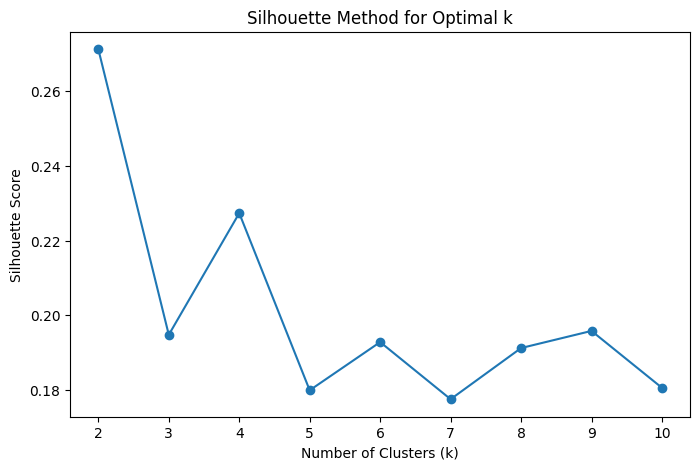

In [46]:
from sklearn.metrics import silhouette_score

# Range of cluster values to test
k_values = range(2, 11)  # Silhouette score requires at least 2 clusters
silhouette_scores = []

# Calculate silhouette score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [47]:

# Step 3: Fit K-means with optimal number of clusters
optimal_k = 4  # Replace this with your chosen value from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

df[columns_to_cluster] = df[columns_to_cluster].apply(pd.to_numeric, errors='coerce')

# Step 4: Analyze the results
cluster_stats = df.groupby('Cluster')[columns_to_cluster].mean()

# Add the size of each cluster to the results
cluster_size = df['Cluster'].value_counts()

# Print the mean values and cluster sizes
print(cluster_stats)
print("\nCluster Sizes:")
print(cluster_size)

         BEVERAGES WITH ALCOHOL    CHEESE  DELICATESSEN AND READY MEALS  \
Cluster                                                                   
0                      0.037943  0.113706                      0.013318   
1                      0.037983  0.099365                      0.019373   
2                      0.046192  0.079335                      0.023048   
3                      0.058134  0.087212                      0.033501   

         FRESH MEAT  FRUITS AND VEGETABLES  
Cluster                                     
0          0.035874               0.081773  
1          0.082871               0.073653  
2          0.051161               0.097930  
3          0.064632               0.088823  

Cluster Sizes:
Cluster
1    174
3     58
0     47
2     40
Name: count, dtype: int64


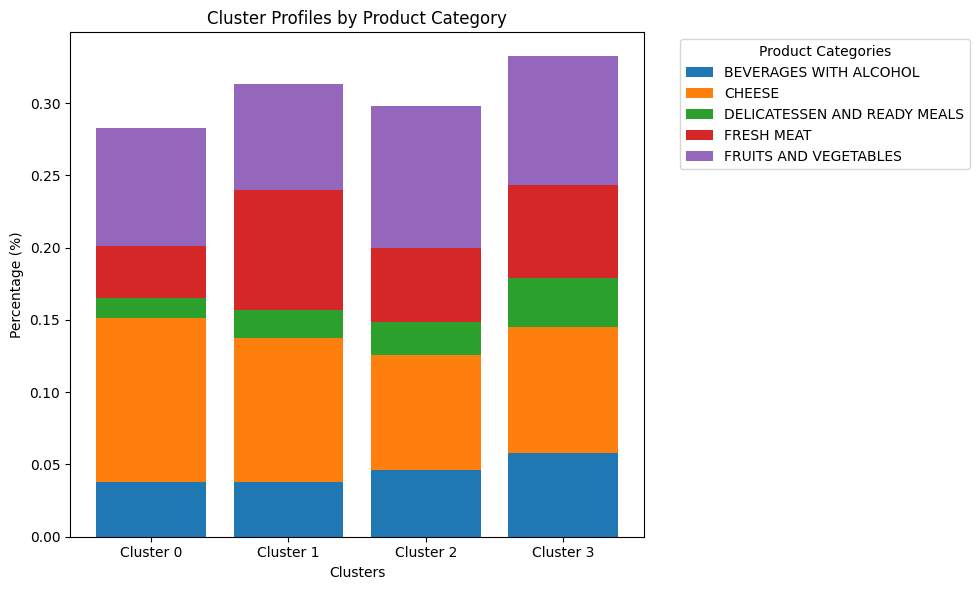

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Transpose the cluster_stats for easier plotting
cluster_stats_transposed = cluster_stats.T

# Cluster labels for the x-axis
clusters = cluster_stats_transposed.columns

# Product categories
categories = cluster_stats_transposed.index

# Create the bar positions
x = np.arange(len(clusters))

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create a stacked bar chart
bottom = np.zeros(len(clusters))  # Track the bottom of each bar for stacking
for category in categories:
    plt.bar(
        x, 
        cluster_stats_transposed.loc[category], 
        bottom=bottom, 
        label=category
    )
    bottom += cluster_stats_transposed.loc[category]  # Update the bottom for the next segment

# Add labels, title, and legend
plt.xlabel("Clusters")
plt.ylabel("Percentage (%)")
plt.title("Cluster Profiles by Product Category")
plt.xticks(x, [f"Cluster {i}" for i in clusters])  # Label clusters on the x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Product Categories")

# Show the plot
plt.tight_layout()
plt.show()